<a href="https://colab.research.google.com/github/Hurabashi/Tribe-of-Ai-Projects/blob/master/seimas_D_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this project we will explore data from Lithuanian Parliament

In [ ]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests
import re
import urllib

import seaborn as sns
import matplotlib.pyplot as plt 

print("Setup Complete")

Setup Complete


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


After importing the libraries, we can move to importing the data.
One of the data sources is official Lithuanian government website, for that we create a function to make a pandas DataFrame out of XML tags.

In [ ]:
def candidacy_to_df(candidacy_nr):
  '''Creates and returns a DataFrame of a specified candidacy.'''

  #Set up access to the website
  url = f"https://apps.lrs.lt/sip/p2b.ad_seimo_nariai?kadencijos_id={candidacy_nr}"
  user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:65.0) Gecko/20100101 Firefox/65.0"
  headers = {"user-agent": user_agent}
  resp = requests.get(url, headers=headers)

  #Try to connect
  if resp.status_code == 200:
    soup = BeautifulSoup(resp.content, "html.parser")
  else:
    print('Error in web access')
  
  #Find number of parliament members ("seimonarys" is MP in Lithuanian)
  soup_text = str(soup.find_all('seimonarys'))
  soup_lenght = len(re.findall(r'seimonarys', soup_text)) / 2

  #Create dictionary list out of them (data is stored in tags)
  soup_dic_list = []
  i = 0
  while i < soup_lenght:
    soup_dic = soup.find('seimonarys').attrs
    soup_dic_list.append(soup_dic)
    soup.find('seimonarys').decompose()
    i = i + 1
  
  #Rename collumns to English names
  df = pd.DataFrame(soup_dic_list)
  df.rename(columns={'asmens_id':'id',
                     'vardas':'name',
                     'pavardė':'surname',
                     'lytis':'gender',
                     'data_nuo':'starting_date',
                     'data_iki':'ending_date',
                     'iškėlusi_partija':'political_party',
                     'išrinkimo_būdas':'way_of_electing',
                     'kadencijų_skaičius':'number_of_candidacies'},
                      inplace=True)
  try:
    df.rename(columns={'biografijos_nuoroda':'link_to_bio'}, inplace=True)
  except:
    pass
    
  return df

In [ ]:
#Create DataFrames for all candidacies
candidacy_1 = candidacy_to_df(1)
candidacy_2 = candidacy_to_df(2)
candidacy_3 = candidacy_to_df(3)
candidacy_4 = candidacy_to_df(4)
candidacy_5 = candidacy_to_df(5)
candidacy_6 = candidacy_to_df(6)
candidacy_7 = candidacy_to_df(7)
candidacy_8 = candidacy_to_df(8)


In [ ]:
def print_start_end_date(candidacy):
  '''Prints the minimal starting and maximum ending dates of given candidacy.'''

  print(candidacy['starting_date'].min())
  print(candidacy['ending_date'].max())
  print('')

print_start_end_date(candidacy_3)
print_start_end_date(candidacy_4)
print_start_end_date(candidacy_5)
print_start_end_date(candidacy_6)
print_start_end_date(candidacy_7)
print_start_end_date(candidacy_8)

1996-11-25
2000-10-18

2000-10-19
2004-11-14

2004-11-15
2008-11-17

2008-11-17
2012-11-16

2012-11-16
2016-11-14

2016-11-14
2019-11-28



Next we import data from Kaggle on votes made by the Parliament members

In [ ]:
'''
To reproduce this step you need to create a folder in My Drive named Kaggle,
then go to Kaggle.com>My Account>Create New API Token and upload your
token to Kaggle folder in Google Drive.

Alternatively, you can skip this cell and just download votes.csv dataset from
Kaggle manualy.
'''
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

#/content/gdrive/My Drive/Kaggle 
#is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle

!kaggle datasets download -d sirexo/lithuanian-paliament-votes

!ls

#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle
 60% 17.0M/28.4M [00:00<00:00, 35.6MB/s]
100% 28.4M/28.4M [00:00<00:00, 44.8MB/s]
kaggle.json  lithuanian-paliament-votes.zip  votes.csv
Archive:  lithuanian-paliament-votes.zip
replace votes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: votes.csv               


Here we can see a problem, votes data fully includes only some candidacies


In [ ]:
%cd /content/gdrive/My Drive/Kaggle
votes_data = pd.read_csv('votes.csv',
                         parse_dates=['time'],
                         dtype={'question': str})

minmax = votes_data['time'].agg(['min', 'max'])
print(minmax)
votes_data.head()

/content/gdrive/My Drive/Kaggle
min   1997-09-11 12:22:05
max   2017-11-23 18:29:40
Name: time, dtype: datetime64[ns]


,voting_id,voter_id,time,group,voter,question,sitting_type,vote,n_eligible_voters,n_voters
0,-26066,79161,2017-05-04 10:05:43,LVŽSF,Ačienė Vida,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106
1,-26066,48690,2017-05-04 10:05:43,TS-LKDF,Adomėnas Mantas,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106
2,-26066,79162,2017-05-04 10:05:43,LSF,Alekna Virgilijus,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106
3,-26066,79163,2017-05-04 10:05:43,TTF,Andrikis Rimas,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106
4,-26066,79164,2017-05-04 10:05:43,LSF,Armonaitė Aušrinė,dėl patikslintos darbotvarkės patvirtinimo,rytinis,1.0,140,106


So we filter out data for 4th to 7th candidacies and aggregate it by ID.
Then merge it with Parliament Dataframe

In [ ]:
def votes_agg_and_merge(df, begin, end):
  '''Merges votes DataFrame and candidacy DataFrame based on dates.'''

  #Select time of the votes
  votes = votes_data.loc[(votes_data.time >= begin) & (votes_data.time <= end)]

  #Aggregate votes data
  votes_total = votes.groupby('voter_id').voter_id.count()
  votes_disagree = votes.loc[votes.vote == -1.0].groupby('voter_id').voter_id.count()
  votes_abstain = votes.loc[votes.vote == -0.5].groupby('voter_id').voter_id.count()
  votes_agree = votes.loc[votes.vote == 1.0].groupby('voter_id').voter_id.count()
  

  #Create DataFrames from Series and reindex them
  votes_total = votes_total.to_frame(name='total_votes')
  votes_total = votes_total.reset_index().rename(columns={votes_total.index.name: 'id'})

  votes_disagree = votes_disagree.to_frame(name='disagree_votes')
  votes_disagree = votes_disagree.reset_index().rename(columns={votes_disagree.index.name: 'id'})

  votes_abstain = votes_abstain.to_frame(name='abstain_votes')
  votes_abstain = votes_abstain.reset_index().rename(columns={votes_abstain.index.name: 'id'})

  votes_agree = votes_agree.to_frame(name='agree_votes')
  votes_agree = votes_agree.reset_index().rename(columns={votes_agree.index.name: 'id'})


  #Making merging atributes the same type
  votes_total.id = votes_total.id.astype(int)
  votes_disagree.id = votes_disagree.id.astype(int)
  votes_abstain.id = votes_abstain.id.astype(int)
  votes_agree.id = votes_agree.id.astype(int)
  df.id = df.id.astype(int)

  #Merging all the DataFrames to one
  df = pd.merge(df, votes_total, on='id')
  df = pd.merge(df, votes_disagree, on='id')
  df = pd.merge(df, votes_abstain, on='id')
  df = pd.merge(df, votes_agree, on='id')
  return df


In [ ]:
#Use the function defined earlier to create DataFrames of candidacies from
#2000 to 2016 because we don't have votes information for others
candidacy_4_V = votes_agg_and_merge(candidacy_4,
                              '2000-10-19 00:00:00',
                              '2004-08-17 00:00:00')
candidacy_5_V = votes_agg_and_merge(candidacy_5,
                              '2004-11-15 00:00:00',
                              '2007-10-31 00:00:00')
candidacy_6_V = votes_agg_and_merge(candidacy_6,
                              '2008-11-17 00:00:00',
                              '2011-07-26 00:00:00')
candidacy_7_V = votes_agg_and_merge(candidacy_7,
                              '2012-11-16 00:00:00',
                              '2016-09-14 00:00:00')
candidacy_7_V

,id,name,surname,gender,starting_date,ending_date,political_party,way_of_electing,number_of_candidacies,total_votes,disagree_votes,abstain_votes,agree_votes
0,47852,Remigijus,Ačas,V,2012-11-16,2016-11-14,Partija &quot;Tvarka ir teisingumas&quot;,Pagal sąrašą,3,2688,258,570,1860
1,48690,Mantas,Adomėnas,V,2012-11-16,2016-11-14,Tėvynės sąjunga - Lietuvos krikščionys demokratai,Pagal sąrašą,2,4118,430,705,2983
2,7229,Vilija,Aleknaitė Abramikienė,M,2012-11-16,2016-11-14,Tėvynės sąjunga - Lietuvos krikščionys demokratai,Pagal sąrašą,6,4220,364,878,2978
3,7,Vytenis Povilas,Andriukaitis,V,2012-11-16,2014-09-15,Lietuvos socialdemokratų partija,Žirmūnų (Nr. 4) apygardoje,6,364,35,46,283
4,53916,Arvydas,Anušauskas,V,2012-11-16,2016-11-14,Tėvynės sąjunga - Lietuvos krikščionys demokratai,Senamiesčio (Nr. 2) apygardoje,2,4213,365,948,2900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,47836,Edvardas,Žakaris,V,2012-11-16,2016-11-14,Lietuvos socialdemokratų partija,Aušros (Nr. 23) apygardoje,3,6332,143,1360,4829
145,34505,Pranas,Žeimys,V,2012-11-16,2016-11-14,Tėvynės sąjunga - Lietuvos krikščionys demokratai,Pajūrio (Nr. 22) apygardoje,2,7026,758,995,5273
146,65703,Remigijus,Žemaitaitis,V,2012-11-16,2016-11-14,Partija &quot;Tvarka ir teisingumas&quot;,Šilalės - Šilutės (Nr. 33) apygardoje,2,3718,111,724,2883
147,53926,Rokas,Žilinskas,V,2012-11-16,2016-11-14,Tėvynės sąjunga - Lietuvos krikščionys demokratai,Pagal sąrašą,2,4824,361,753,3710


In [ ]:
#And then join them and creat a list of them
candidacies_list = [candidacy_1, candidacy_2, candidacy_3, candidacy_4_V,
                    candidacy_5_V, candidacy_6_V, candidacy_7_V, candidacy_8]
df = pd.concat([candidacy_1, candidacy_2, candidacy_3, 
                candidacy_4_V, candidacy_5_V, candidacy_6_V,
                candidacy_7_V, candidacy_8]).reset_index()

#"Pagal sąrašą" is Lithuanian for by the list, meaning that candidate was
#elected not localy but by people all over the country
df.loc[df['way_of_electing'] == 'Pagal sąrašą', 'way_of_electing'] = 'By the list'

df

,index,id,name,surname,gender,starting_date,ending_date,political_party,way_of_electing,number_of_candidacies,total_votes,disagree_votes,abstain_votes,agree_votes,link_to_bio
0,0,207,Aleksandras Algirdas,Abišala,V,1990-03-10,1992-11-22,Darbo kolektyvai,Vytauto (Nr. 22) apygardoje,1,NaN,NaN,NaN,NaN,NaN
1,1,208,Stanislav,Akanovič,V,1990-03-10,1992-11-22,Darbo kolektyvai,Maišiagalos (Nr. 113) apygardoje,1,NaN,NaN,NaN,NaN,NaN
2,2,165,Povilas,Aksomaitis,V,1990-03-10,1992-11-22,Visuomeninė organizacija,Šėtos (Nr. 88) apygardoje,1,NaN,NaN,NaN,NaN,NaN
3,3,5,Nijolė,Ambrazaitytė,M,1990-03-10,1992-11-22,Lietuvos persitvarkymo sąjūdis,Panerių (Nr. 14) apygardoje,1,NaN,NaN,NaN,NaN,NaN
4,4,153,Aleksandras,Ambrazevičius,V,1990-03-10,1992-11-22,Gyventojų susirinkimas,Taikos (Nr. 25) apygardoje,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,149,79160,Virginija,Vingrienė,M,2016-11-14,,Lietuvos valstiečių ir žaliųjų sąjunga,By the list,1,NaN,NaN,NaN,NaN,http://www.lrs.lt/sip/portal.show?p_r=8801&p_k...
1185,150,272,Antanas,Vinkus,V,2016-11-14,,Lietuvos socialdemokratų partija,Kretingos-Palangos (Nr. 36) apygardoje,1,NaN,NaN,NaN,NaN,http://www.lrs.lt/sip/portal.show?p_r=8801&p_k...
1186,151,43,Emanuelis,Zingeris,V,2016-11-14,,Tėvynės sąjunga - Lietuvos krikščionys demokratai,By the list,7,NaN,NaN,NaN,NaN,http://www.lrs.lt/sip/portal.show?p_r=8801&p_k...
1187,152,65703,Remigijus,Žemaitaitis,V,2016-11-14,,Partija Tvarka ir teisingumas,Pietų Žemaitijos (Nr. 33) apygardoje,3,NaN,NaN,NaN,NaN,http://www.lrs.lt/sip/portal.show?p_r=8801&p_k...


### Now we have our DataFrames and can move to analysis


In [ ]:
def gender_coefficient(df):
  '''Returns percent of females in a given DataFrame'''

  gender_series = df.groupby('gender').gender.count()
  try:
    gender_coefficient = (gender_series['M'] / gender_series['V']) * 100
  except:
    gender_coefficient = None

  return gender_coefficient

print(gender_coefficient(df))
print(gender_coefficient(candidacy_1))
print(gender_coefficient(candidacy_8))
print(gender_coefficient(df.loc[(df['way_of_electing'] == 'By the list')]))
print(gender_coefficient(df.loc[(df['way_of_electing'] != 'By the list')]))


20.344129554655872
10.9375
31.62393162393162
24.585635359116022
17.89137380191693


As we can see there is a significant difference between the candidacies, lets create a DataFrame and visualize it.

In [ ]:
def gender_cof_df_list(df_list, skip_filter=True, localy=False):
  '''
  Returns a list of gender coefficients, applies gender_coefficient to a list of
  DataFrames depending on applied filters.
  
  '''

  gender_cof_list = []
  for candidacy in df_list:
    if skip_filter:
      df_filtered = candidacy
      gender_cof_list.append(gender_coefficient(df_filtered))
    elif localy:
      df_filtered = candidacy.loc[(candidacy['way_of_electing'] != 
                                   'By the list')]
      gender_cof_list.append(gender_coefficient(df_filtered))
    else:
      df_filtered = candidacy.loc[(candidacy['way_of_electing'] == 
                                   'By the list')]
      gender_cof_list.append(gender_coefficient(df_filtered))
    
  return gender_cof_list


In [ ]:
data = {'General':gender_cof_df_list(candidacies_list),
        'Not_localy_elected':gender_cof_df_list(candidacies_list,False,False),
        'Localy_elected':gender_cof_df_list(candidacies_list,False,True)}
gender_df = pd.DataFrame(data, index=[1990,1992,1996,2000,2004,2008,2012,2016])
gender_df

,General,Not_localy_elected,Localy_elected
1990,10.937500,NaN,10.156250
1992,8.029197,6.060606,9.859155
1996,19.841270,21.212121,18.333333
2000,13.076923,14.754098,11.594203
2004,29.824561,NaN,29.824561
2008,22.950820,28.813559,17.460317
2012,30.701754,38.181818,23.728814
2016,31.623932,41.818182,22.580645


In [ ]:
def plotter_help(name_of_plot='', size=(10,10), y='', x=''):
  '''Names a plot, axes and defines plot size'''
  
  plt.figure(figsize=size)
  plt.title(name_of_plot)
  plt.ylabel(y)
  plt.xlabel(x)

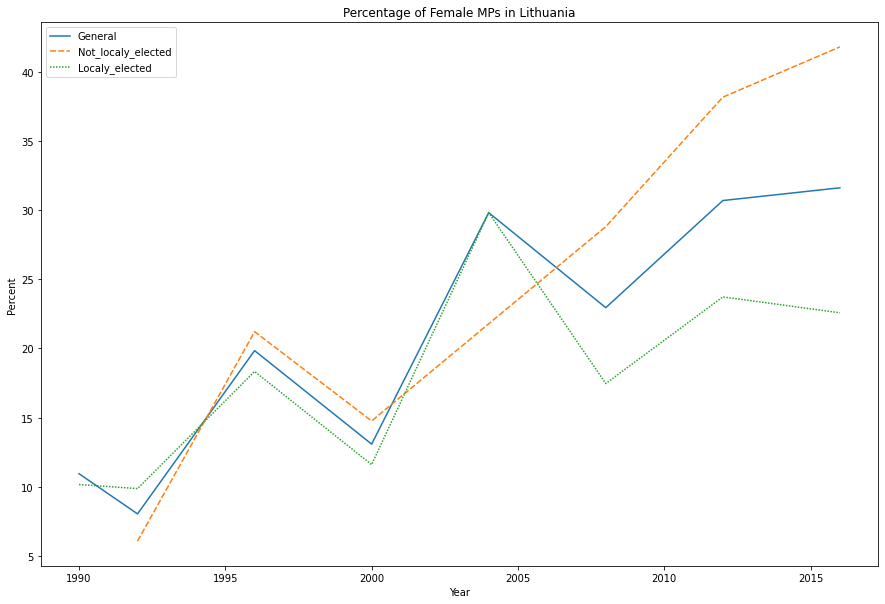

In [ ]:
plotter_help(name_of_plot='Percentage of Female MPs in Lithuania',
             size=(15,10),
             y='Percent',
             x='Year')
sns.lineplot(data=gender_df)


Now lets analyse other aspects of our data

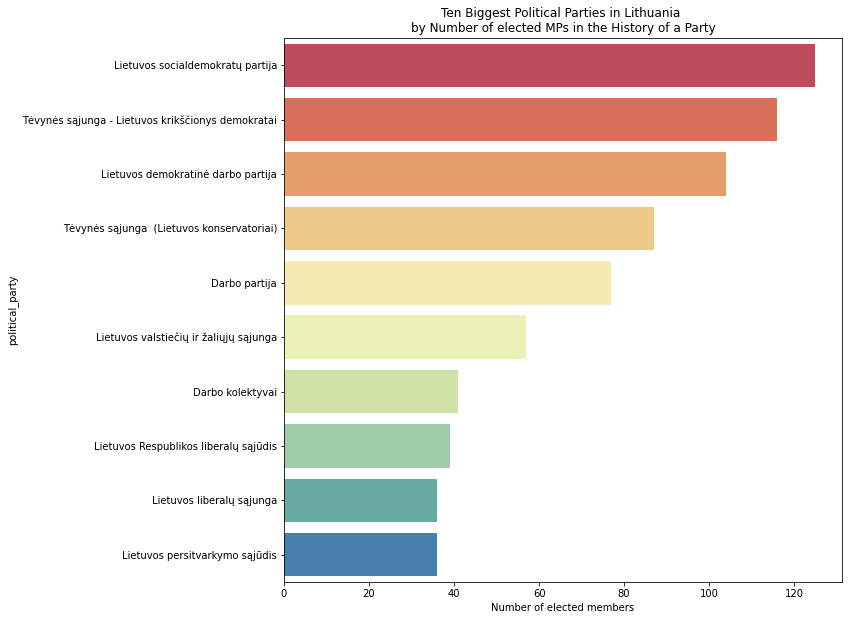

In [ ]:
series_parties = df.groupby('political_party').political_party.count().sort_values(ascending=False)
plotter_help(name_of_plot='Ten Biggest Political Parties in Lithuania \n'
            +'by Number of elected MPs in the History of a Party',
             x='Number of elected members')
sns.barplot(y=series_parties[0:10].index,
            x=series_parties[0:10].values,
            palette='Spectral')

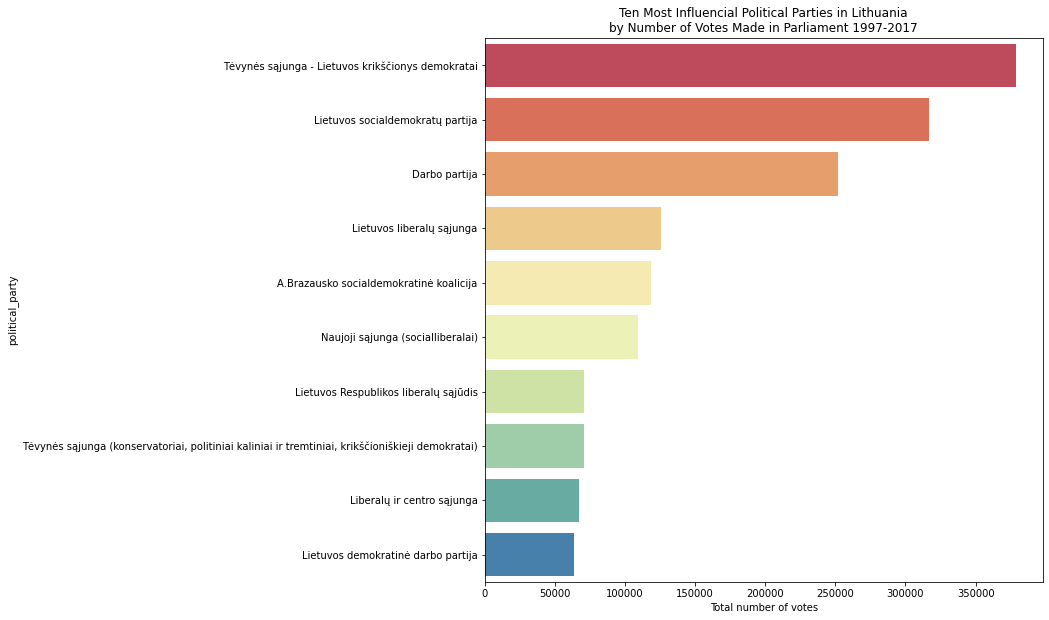

In [ ]:
series_parties = df.groupby('political_party').total_votes.sum().sort_values(ascending=False)
plotter_help(name_of_plot='Ten Most Influencial Political Parties in Lithuania\n'
            +'by Number of Votes Made in Parliament 1997-2017',
             x='Total number of votes')
sns.barplot(y=series_parties[0:10].index,
            x=series_parties[0:10].values,
            palette='Spectral')

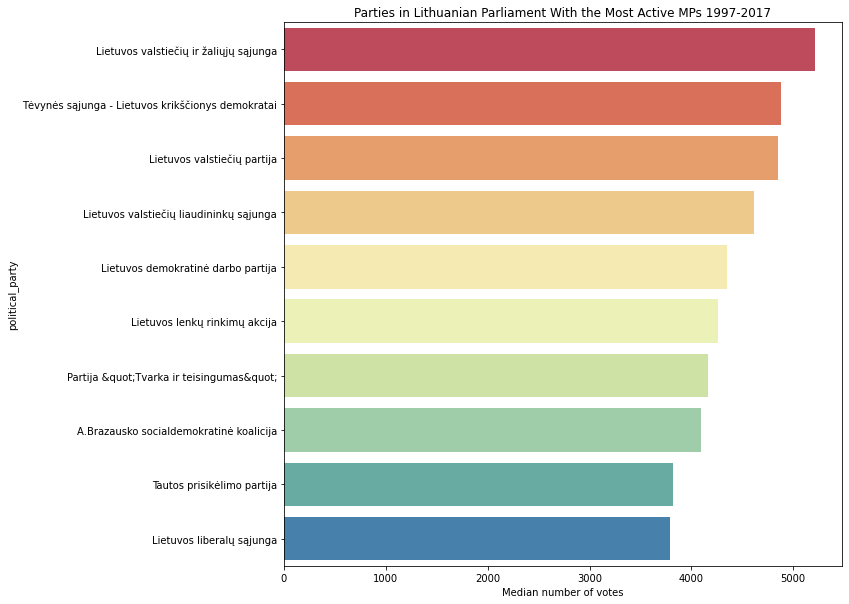

In [ ]:
series_parties = df.groupby('political_party').total_votes.median().sort_values(ascending=False)
plotter_help(name_of_plot='Parties in Lithuanian Parliament With the Most Active MPs 1997-2017',
             x='Median number of votes')
sns.barplot(y=series_parties[0:10].index,
            x=series_parties[0:10].values,
            palette='Spectral')


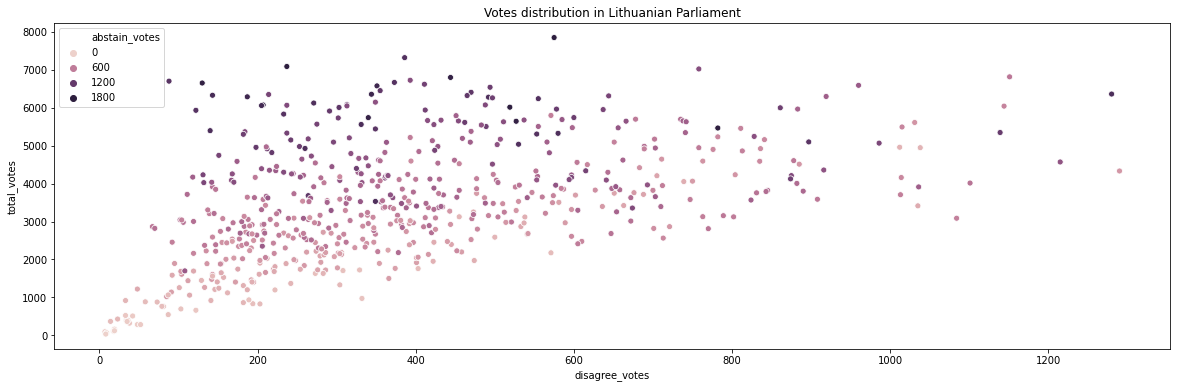

In [ ]:
plotter_help(name_of_plot='Votes distribution in Lithuanian Parliament',
             size=(20,6))
sns.scatterplot(x=df['disagree_votes'],
                y=df['total_votes'],
                hue=df['abstain_votes'])

In [ ]:
#Here in top-left corner we can see a small cluster of MPs who are active
#But usually don't vote against anything and are more likely to abstain.

Text(0.5, 0, 'Elected localy')

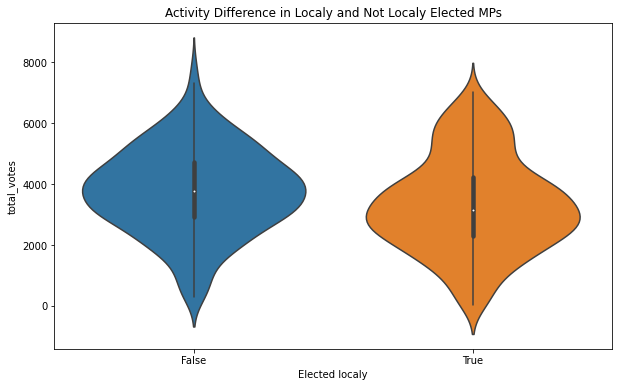

In [ ]:
plotter_help(name_of_plot='Activity Difference in Localy and Not Localy Elected MPs',
             size=(10,6))
sns.set_style("whitegrid")
sns.violinplot(x=(df['way_of_electing'] != 'By the list'),
              y=df['total_votes'])
plt.xlabel('Elected localy')


In [ ]:
#In this violin plot we can see that not localy elected politicians are slightly
#more active in Parliament then localy elected ones

In [ ]:
def find_majority_percent(cad):
  '''Returns percentage of MPs in largest party for given candidacy'''

  majority = cad.groupby('political_party').id.count().max()
  all_mps = cad.id.count()

  return (majority / all_mps) * 100


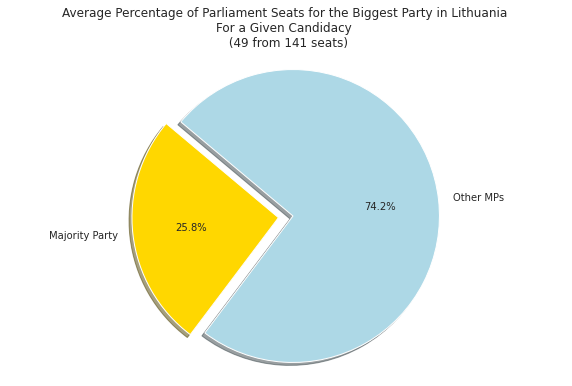

In [ ]:
def avg_from_list(cad_list):
  '''Returns the average percent of majority party'''

  rate = 0
  for i in cad_list:
    rate = rate + find_majority_percent(i)
  cad_number = len(cad_list)

  return rate/cad_number


# Data to plot
labels = 'Majority Party', 'Other MPs'
sizes = [avg_from_list(candidacies_list)*0.01*141, 141]
colors = ['gold', 'lightblue']
explode = (0.1, 0) 

# Plot
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct = '%1.1f%%', shadow=True, startangle=140)
title_str = ('Average Percentage of Parliament Seats for '
             +'the Biggest Party in Lithuania \n'
             +'For a Given Candidacy \n'
             +' ({} from 141 seats)')
plt.title(title_str.format(int(avg_from_list(candidacies_list)*0.01*141)))

plt.axis('equal')
plt.show()


Now knowing the average of majority, lets find out how it changed over the years

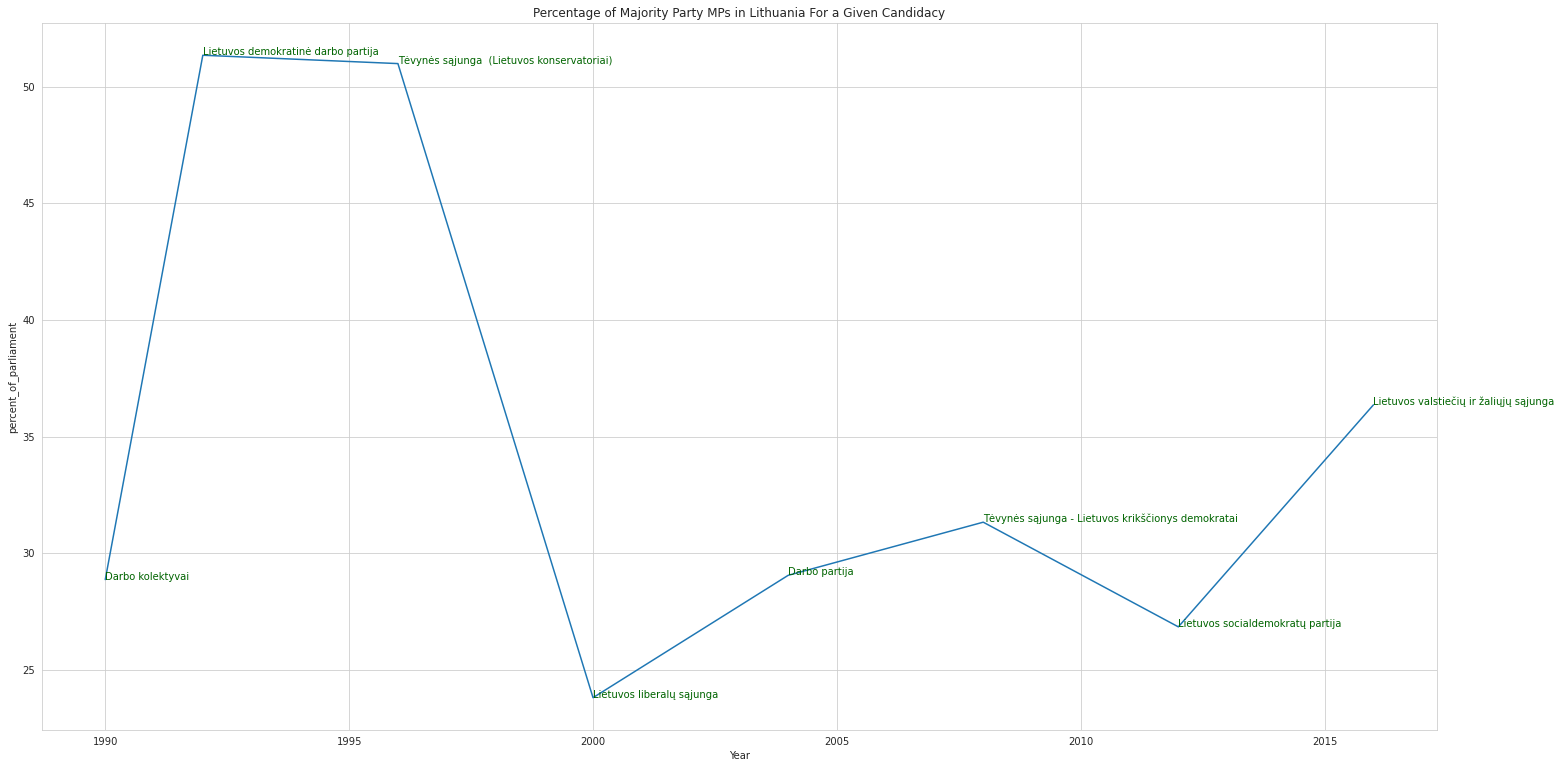

In [ ]:
majority_party_list = []
majority_percent_list = []
for cad in candidacies_list:
  counts = pd.DataFrame(cad.groupby('political_party').id.count())
  majority_party = counts.loc[counts['id'] == counts.max()[0]].index[0]
  majority_party_list.append(majority_party)

  percent = find_majority_percent(cad)
  majority_percent_list.append(percent)

data = {'party_name':majority_party_list,
        'percent_of_parliament':majority_percent_list}
majority_ts = pd.DataFrame(data,
                           index=[1990,1992,1996,2000,2004,2008,2012,2016])

plotter_help(name_of_plot='Percentage of Majority Party MPs in Lithuania '
              +'For a Given Candidacy',
             size=(25,13),
             x='Year')
sns.lineplot(x=majority_ts.index,
             y=majority_ts['percent_of_parliament'])

for i in range(len(candidacies_list)):
  plt.text(x=majority_ts.index[i],
          y=majority_ts['percent_of_parliament'].loc[majority_ts.index[i]],
          s=majority_ts['party_name'].loc[majority_ts.index[i]],
          color='darkgreen')